## The Covid-19 Dataset Analysis
##### Source: Kaggle
##### Website link: https://www.kaggle.com/datasets/meirnizri/covid19-dataset
##### Sources of inspiration:
##### YASIR AKYÜZLÜ, https://www.kaggle.com/code/yasirakyzl/covid-19-ml-model-90-accuracy
##### IMZEEPO, https://www.kaggle.com/code/imzeepo/covid-19-logistic-regression-random-forest

## Content
#### 1) Problem Statement
#### 2) The Bigger Picture and Purpose
#### 3) Data Description: Variables Explained
#### 4) Exploratory Data Analysis

### 1) Problem Statement
##### The purpose here is to predict the whether a patient is a high risk or low risk. This is aimed to assist medical professionals working at hospitals and facilities that house patients. They want to know whether a patient is high risk or not in order to treat them appropriately, using resources efficiently. It is very important for such facilities to be accurate in their identification of high risk patients specifically. This is because they do not want to use expensive and limited resources on people that are low risk, creating a situation where a significant proportion of true high risk patients are neglected. This is why I will focus precision, maximizing it as much as possible. At the same time I want to maintain a reasonable balance of accuracies between the two classes which is why I want to maintain the f1_score above 0.75.

### 2) The Bigger Picture and Purpose
##### To be able to differentiate high and low risk patients is of great importance to healthcare services. Preemptively understanding whether a patient is high or low risk allows healthcare services distribute their resources appropriately creating an efficient healthcare system. It was quite evident that healthcare services were under a lot of pressure during the COVID pandemic (between around December 2019 to January 2023) and branches of it that dealt with other serious pathologies were neglected as a result.

##### Creating models that can reliably predict high and low risk patients can be beneficial for other possibly upcoming pandemics. We can learn from modelling one virus and apply some of this knowledge to another, ofcourse the biological literature must be considered to draw such conclusions (e.g. applied to viruses that affect the respiratory system).

### 3) The Data
#### Variables
##### 1) Sex: 1 for female and 2 for male.
##### 2) Age: of the patient.
##### 3) Classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in differen degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
##### 4) Patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
##### 5) Pneumonia: whether the patient already have air sacs inflammation or not.
##### 6) Pregnancy: whether the patient is pregnant or not.
##### 7) Diabetes: whether the patient has diabetes or not.
##### 8) COPD: indicates whether the patient has Chronic obstructive pulmonary disease or not.
##### 9) Asthma: whether the patient has asthma or not.
##### 10) Inmsupr: whether the patient is immunosuppressed or not.
##### 11) Hypertension: whether the patient has hypertension or not.
##### 12) Cardiovascular: whether the patient has heart or blood vessels related disease.
##### 13) Renal chronic: whether the patient has chronic renal disease or not.
##### 14) Other disease: whether the patient has other disease or not.
##### 15) Obesity: whether the patient is obese or not.
##### 16) Tobacco: whether the patient is a tobacco user.
##### 17) Usmr: Indicates whether the patient treated medical units of the first, second or third level.
##### 18) Medical unit: type of institution of the National Health System that provided the care.
##### 19) Intubed: whether the patient was connected to the ventilator.
##### 20) Icu: indicates whether the patient had been admitted to an Intensive Care Unit.
##### 21) Date died: if the patient died indicate the date of death, and 9999-99-99 otherwise.
##### N.B. the above list is transferred directly from the Kaggle source page.

#### Other
##### This data has been provided by the Mexican government.
##### License: 'CC0: Public Domain'

### 4) Exploratory Data Analysis
#### Importing all necessary packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Normality testing
from scipy import stats
#user warning line to ignore

##### Reading into the data, checking the first 10 rows, checking shape and data types.

In [2]:
df = pd.read_csv('Covid Data.csv')
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [3]:
df.shape

(1048575, 21)

In [4]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

##### Retrieving the unique values and unique value counts for each variable/feature.

In [5]:
def unique_values(df,columns):
    """Lists unique values of all columns."""
    for x in columns:
        print(f'Unique Values of columns \'{x}\':')
        print(df[x].unique())
        print(f'Unique value counts of column \'{x}\':')
        print(df[x].value_counts())

In [6]:
unique_values(df,df.columns)

Unique Values of columns 'USMER':
[2 1]
Unique value counts of column 'USMER':
2    662903
1    385672
Name: USMER, dtype: int64
Unique Values of columns 'MEDICAL_UNIT':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique value counts of column 'MEDICAL_UNIT':
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
Unique Values of columns 'SEX':
[1 2]
Unique value counts of column 'SEX':
1    525064
2    523511
Name: SEX, dtype: int64
Unique Values of columns 'PATIENT_TYPE':
[1 2]
Unique value counts of column 'PATIENT_TYPE':
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
Unique Values of columns 'DATE_DIED':
['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/0

##### Note that the Kaggle page mentions 99 and 97 are considered missing values. The problem is that for some binary variables a value of 98 is also present (e.g. 'TOBACCO', 'RENAL_CHRONIC', 'OBESITY', 'CARDIOVASCULAR', 'OTHER_DISEASE' etc..). In the feature descriptions it clearly indicates that 'TOBACCO', 'OBESITY' and 'RENAL_CHRONIC' for example are binary variables. The source does not state anything regarding what 98 means. Based on the inference that these are binary features, we will treat 99, 98, 97 as missing values in all binary features.

###### Note: The list of columns that contain nulls:
###### 1) ICU
###### 2) TOBACCO
###### 3) RENAL_CHRONIC
###### 4) OBESITY
###### 5) CARDIOVASCULAR
###### 6) OTHER DISEASE
###### 7) HIPERTENSION
###### 8) INMSUPR
###### 7) ASTHMA
###### 8) COPD
###### 9) DIABETES
###### 10) PREGNANT
###### 11) PNEUMONIA
###### 12) INTUBED

##### Checking for null values.

In [7]:
df_null_gb = df.isnull().sum().reset_index()
df_null_gb[(df_null_gb[0]>0)]

,index,0


##### Although there are no np.NaN or None values the data description mentions that values 99, 98 or 97 represent missing data, we need to account for this.

##### Re-labelling null values appropriately.

In [8]:
l_vars = ['ICU','TOBACCO','RENAL_CHRONIC','OBESITY','CARDIOVASCULAR','OTHER_DISEASE','HIPERTENSION','INMSUPR','ASTHMA','COPD','DIABETES','PREGNANT','PNEUMONIA','INTUBED']
for i in l_vars:
    df[i] = df[i].apply(lambda x: None if x==99 or x==98 or x==97 else x)

In [9]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

##### ICU, INTUBED and PREGNANT are all quite high on null value count. The rest are acceptable, the given rows will be removed before analysis.
##### 1) ICU: A feature that is conceptually related to ICU admission is chronic obstructive pulmonary disease (COPD). COPD increases the COVID dependent mortality rate: a study found an 11% increase (Meza et al, 2021, DOI: 10.2147/COPD.S318000). We can extrapolate that people with COPD and COVID would have some sort of ICU admission priority.
##### 2) INTUBED: Whether a patient is connected to a ventilator is to some degree linked to being in the ICU, although it is not certain that a person will be on a ventilator if they are in the ICU and vice versa. This will be investigated further in the correlation matrix below.
##### 3) PREGNANCY: Conceptually, ONLY females can get pregnant so this gives an avenue for prediction of males. However, there is very scarce information to tell whether a female was pregnant or not. We could fill in the values for males as 0 and investigate any other relationship of pregnancy for females.


In [10]:
#Checking for 'pregnant' males, should not be the case!
df[((df['SEX']==2)&(df['PREGNANT']==1))]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU


In [11]:
#Checking values where pregnancy is missing and sex is male
df[((df['SEX']==2)&(df['PREGNANT'].isnull()))]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,2,1,2,1,03/06/2020,NaN,1.0,72,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
4,2,1,2,1,21/06/2020,NaN,2.0,68,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
11,2,1,2,2,9999-99-99,2.0,2.0,24,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
12,2,1,2,2,9999-99-99,2.0,2.0,30,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,NaN,2.0,40,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048571,1,13,2,2,9999-99-99,2.0,2.0,51,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0
1048572,2,13,2,1,9999-99-99,NaN,2.0,55,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
1048573,2,13,2,1,9999-99-99,NaN,2.0,28,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN


##### There are no males that are pregnant which means that there are no obvious errors. Additionally, the number of missing values of PREGNANT for males is exactly the number of males in the entire dataset. We can therefore complete the dataset by filling in the PREGNANT values for males as 2 meaning 'no'.

In [12]:
def preg_imputer(x,y):
    if x!=x and y==2:
        return 2
    else:
        return x

In [13]:
df['PREGNANT'] = df.apply(lambda x: preg_imputer(x.PREGNANT,x.SEX),axis=1)

In [14]:
df[((df['SEX']==2)&(df['PREGNANT'].isnull()))]
##the code has worked, in the next cell we should still see some null values for pregnant

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU


In [15]:
df.isnull().sum()
##there are still some NaN values, which makes sense.

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

##### Plotting Death Count

In [16]:
##Need to change the 'DATE_DIED' column into a binary
df['DATE_DIED'] = df['DATE_DIED'].apply(lambda x: 0 if x=='9999-99-99' else 1)

In [17]:
df['DATE_DIED'].value_counts(normalize=True)

0    0.926622
1    0.073378
Name: DATE_DIED, dtype: float64

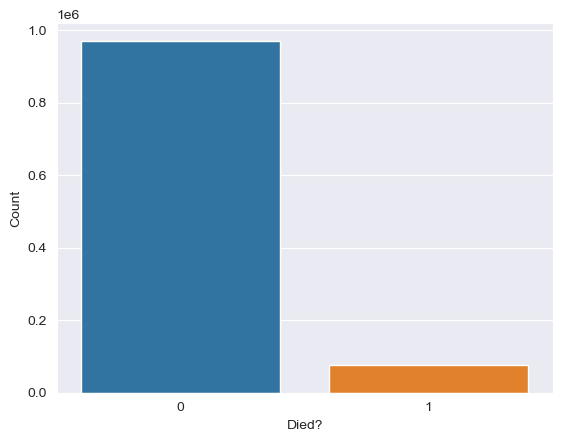

In [18]:
sns.barplot(data = df['DATE_DIED'].value_counts().reset_index(),
            x = 'index',
            y = 'DATE_DIED')
plt.xlabel('Died?')
plt.ylabel('Count')
plt.savefig('Death_counts.png')
plt.show()

##### Our target variable is heavily imbalanced. We can use several techniques to resolve this (Under-sampling, SMOTE, etc). This will be part of the experimentation when we actually model the data.

#### Correlation Heatmap

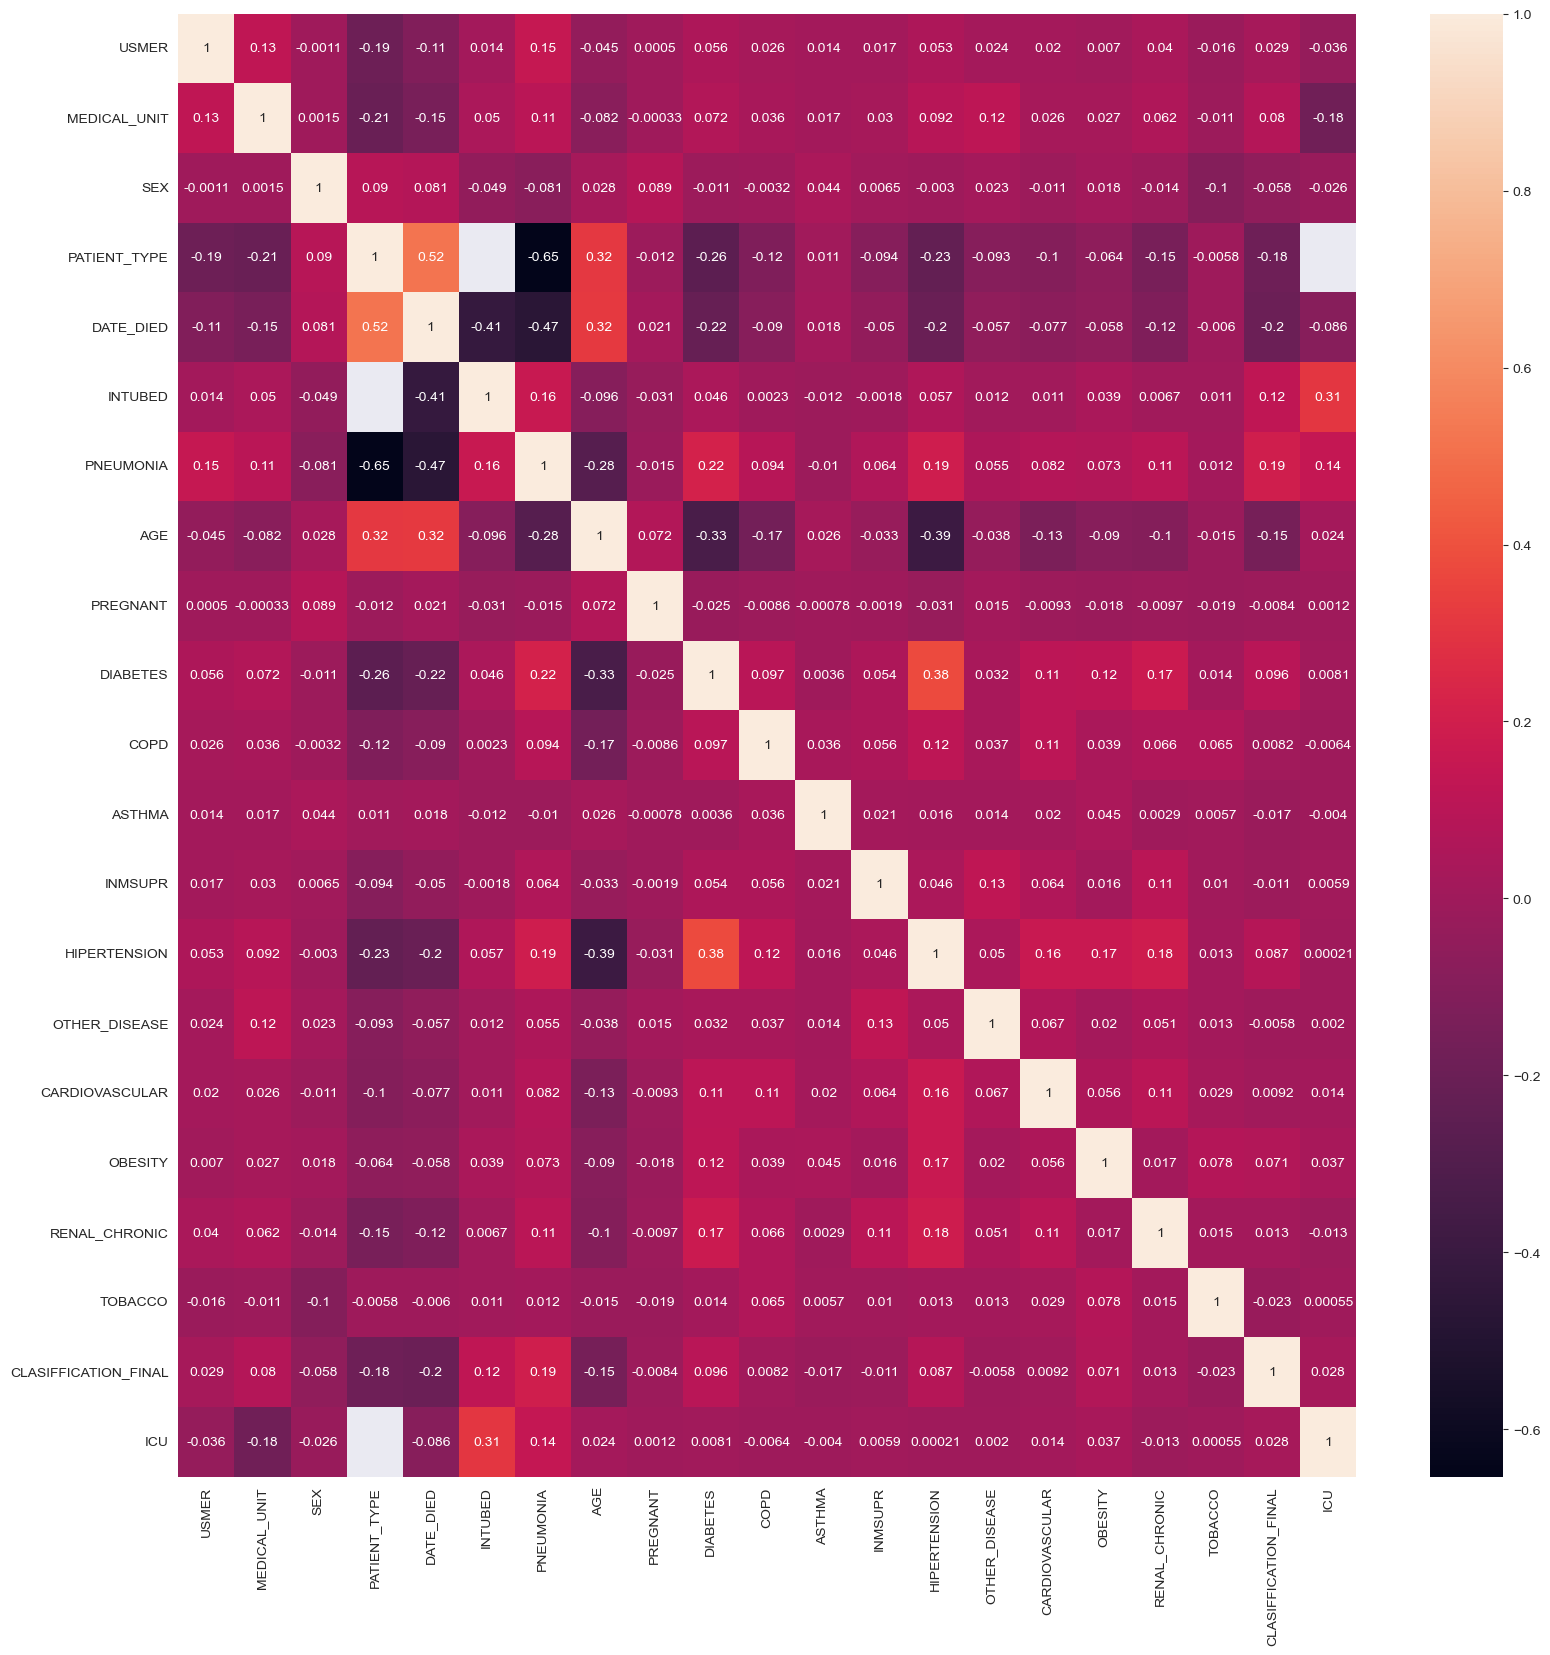

In [19]:
plt.figure(figsize=(19,19))
sns.heatmap(df.corr(),
            annot=True)
plt.show()

##### 1) ICU is not largely correlated to any features except for the 'INTUBED' feature but this is still slight, not even above 50% shared variance. Because of this and the fact that ICU is not related to COPD (as discussed earlier this has a conceptual link) we have no choice but to remove the feature entirely.
##### 2) The same applies to the INTUBED variable in terms of low correlation.
##### Additionally, if we wanted to try and impute either of these there would be a problem. Both of these features have a high missing value rate, when we build a model to try and impute either one, the model would very likely not have any data to predict against because both of the features are missing values at large rates. See the code below.

In [20]:
df[((df['ICU']==df['ICU'])&(df['INTUBED'].isnull()))]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
725746,1,12,2,2,0,NaN,1.0,0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0
727025,1,12,1,2,0,NaN,1.0,1,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0


In [21]:
df[((df['ICU'].isnull())&(df['INTUBED']==df['INTUBED']))]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
9448,1,3,2,2,0,1.0,1.0,63,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5,NaN
10145,1,3,2,2,0,2.0,1.0,6,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,NaN
10240,1,3,1,2,0,1.0,1.0,0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6,NaN
20591,1,4,1,2,1,1.0,2.0,42,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3,NaN
20664,1,4,1,2,1,1.0,2.0,48,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727466,1,12,2,2,0,1.0,1.0,41,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,NaN
727478,1,12,2,2,0,1.0,1.0,66,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,7,NaN
727577,1,12,2,2,0,1.0,1.0,66,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
727581,1,12,1,2,0,1.0,1.0,48,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN


##### There are only 2 rows of data where 'ICU' is NOT missing and 'INTUBED' IS missing. Moreover, there are only 165 rows where 'INTUBED' is NOT missing and 'ICU' IS missing. Relative to the size of the data set, even considering under-sampling of the data at some point, these are miniscule counts, reinforcing the last point mentioned in the above markdown cell.

##### Removing the columns: 'ICU' and 'INTUBED'.

In [22]:
df.drop(columns=['ICU','INTUBED'],axis=1,inplace=True)
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

##### NOTE: The two black boxes in the correlation plot indicate that there is only one unique value. All INTUBED and ICU filled rows also contain PATIENT_TYPE of one class ONLY. Since we removed the 'INTUBED' and 'ICU' columns entirely, this is no-longer a problem.

#### Correlation heatmap after 'ICU' and 'INTUBED' features removed

In [23]:
df_corr_v1 = df.corr()

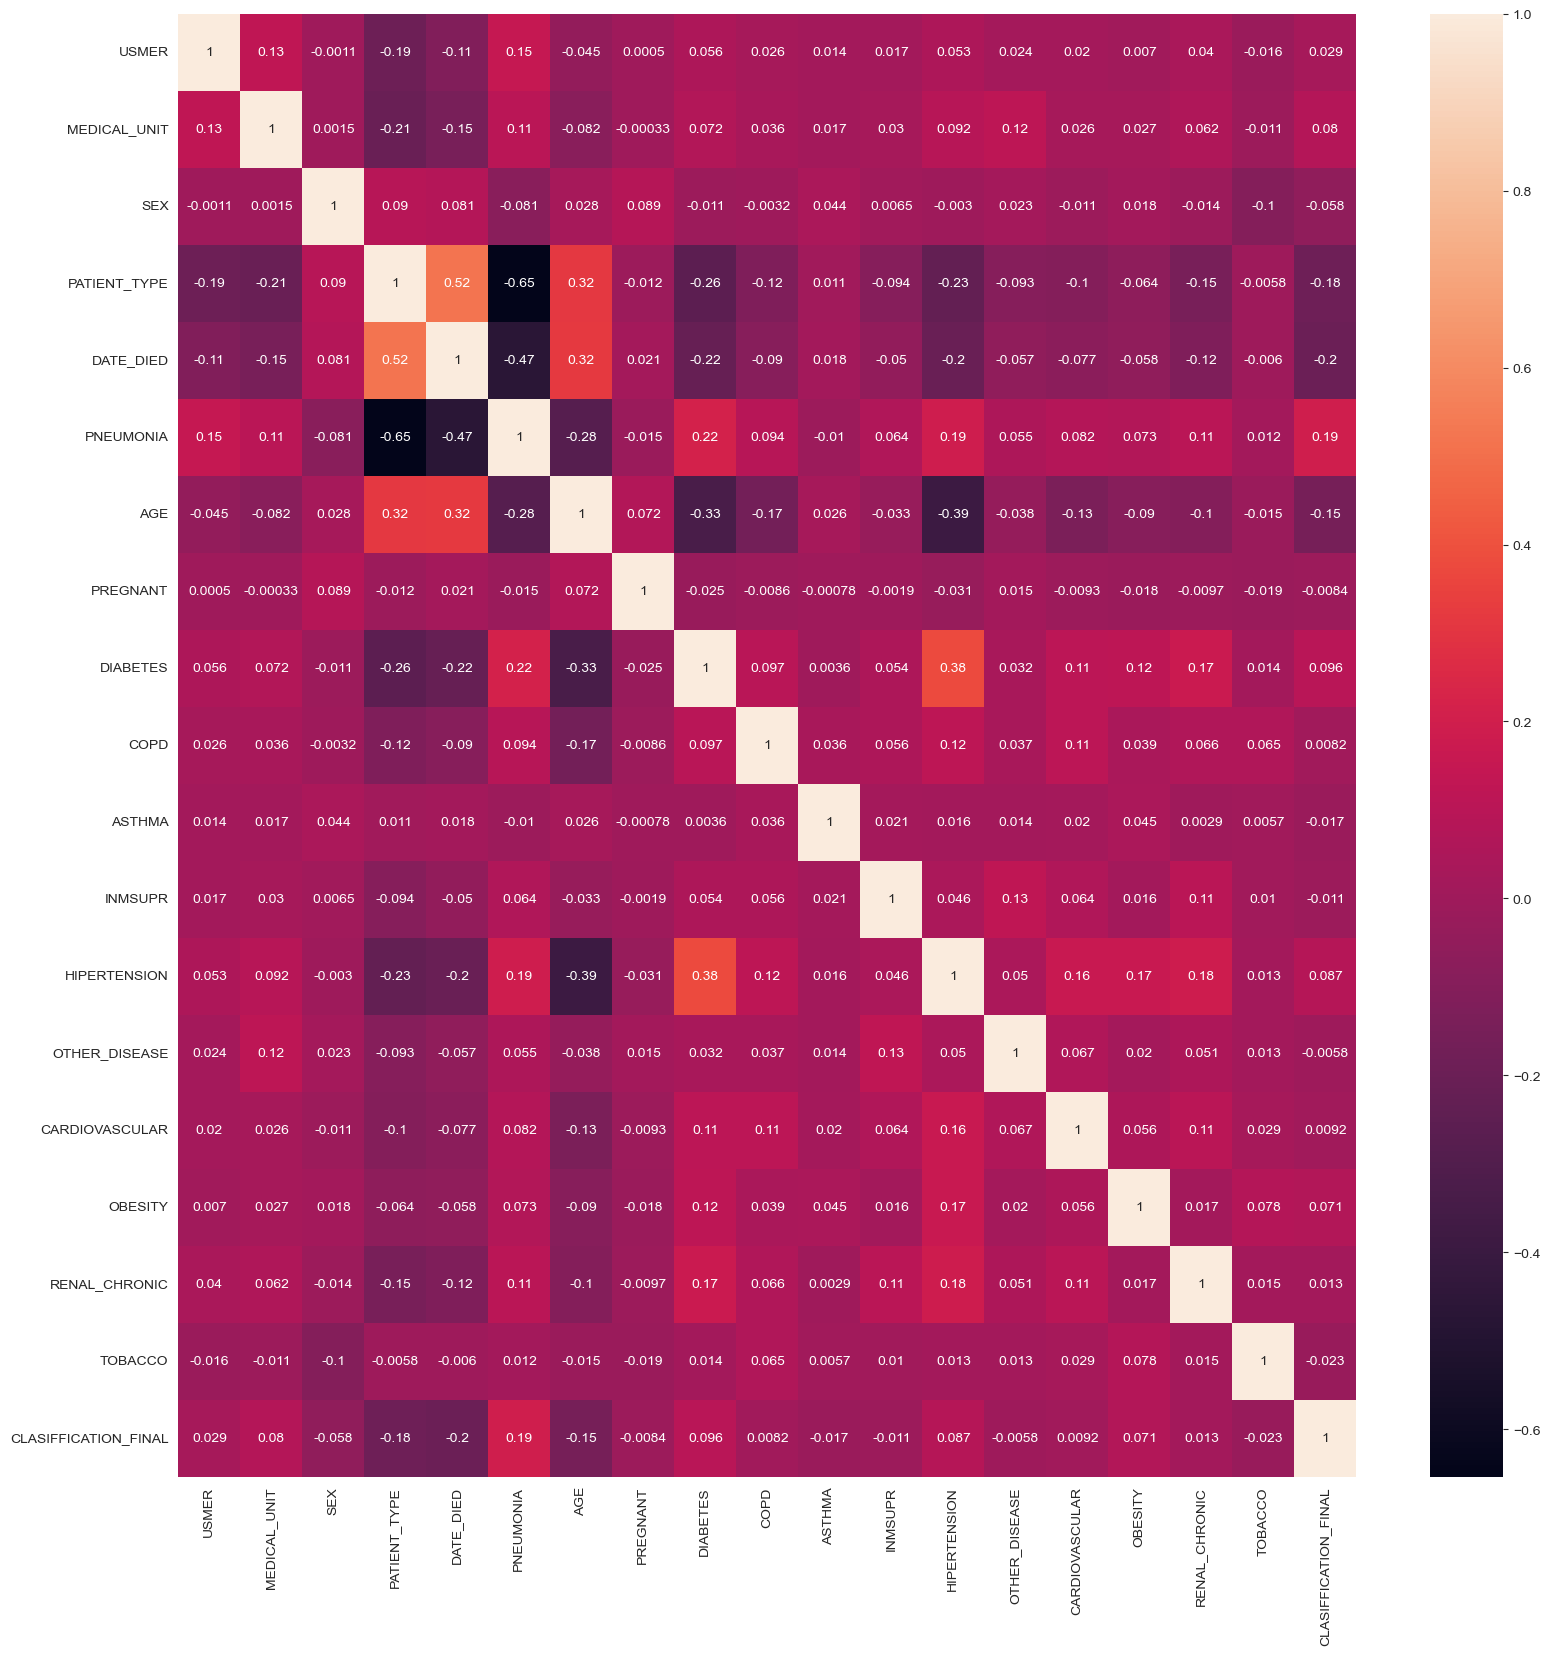

In [24]:
plt.figure(figsize=(19,19))
sns.heatmap(data = df_corr_v1,
            annot = True)
plt.show()

#### The 'CLASSIFICATION_FINAL' feature:
##### This feature represents covid test results stating: 'covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive'.
##### At first, the feature does not seem like it has a clear description and is ambiguous: it is not specified what test it is (PCR or antigen). However, we could interpret it as the level of severity of COVID. 1 being the highest severity and 7 being the lowest, however there COVID severity is tested using physiological testing apart from asymptomatic cases (https://www.covid19treatmentguidelines.nih.gov/overview/clinical-spectrum/#:~:text=Patients%20with%20COVID%2D19%20are,or%20lung%20infiltrates%20%3E50%25).
##### This assumption is largely based on the fact that there is a small correlation between 'DATE_DIED' and 'CLASSIFICATION_FINAL'. This means that the more 'severe' the diagnosis the more the person is likely to die. Additionally, other people that used this data used the variable either in the raw form or mapped the values 1-3 into 1 and 4-7 into 0.
##### Given the finding that there does seem to be a correlation between 'CLASSIFICATION_FINAL' and 'DATE_DIED', which is quite high relative to other features, I will use this feature one hot encoded and treat it as a severity measure.

#### Removing the remaining null values
##### The remaining null value counts are low, largest for 'PNEUMONIA' at 16,003. Compared to the size of the dataset this is small so to not risk adding non-necessary noise to the dataset, we will remove these nulls.

In [25]:
df.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
PNEUMONIA               16003
AGE                         0
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

In [28]:
df.shape

(1021977, 19)

##### As excepted, the number of samples in the data is still large after removing the null remaining null samples for certain variables.

#### Correlation heatmap: missing values removed

In [29]:
df_corr_v2 = df.corr()

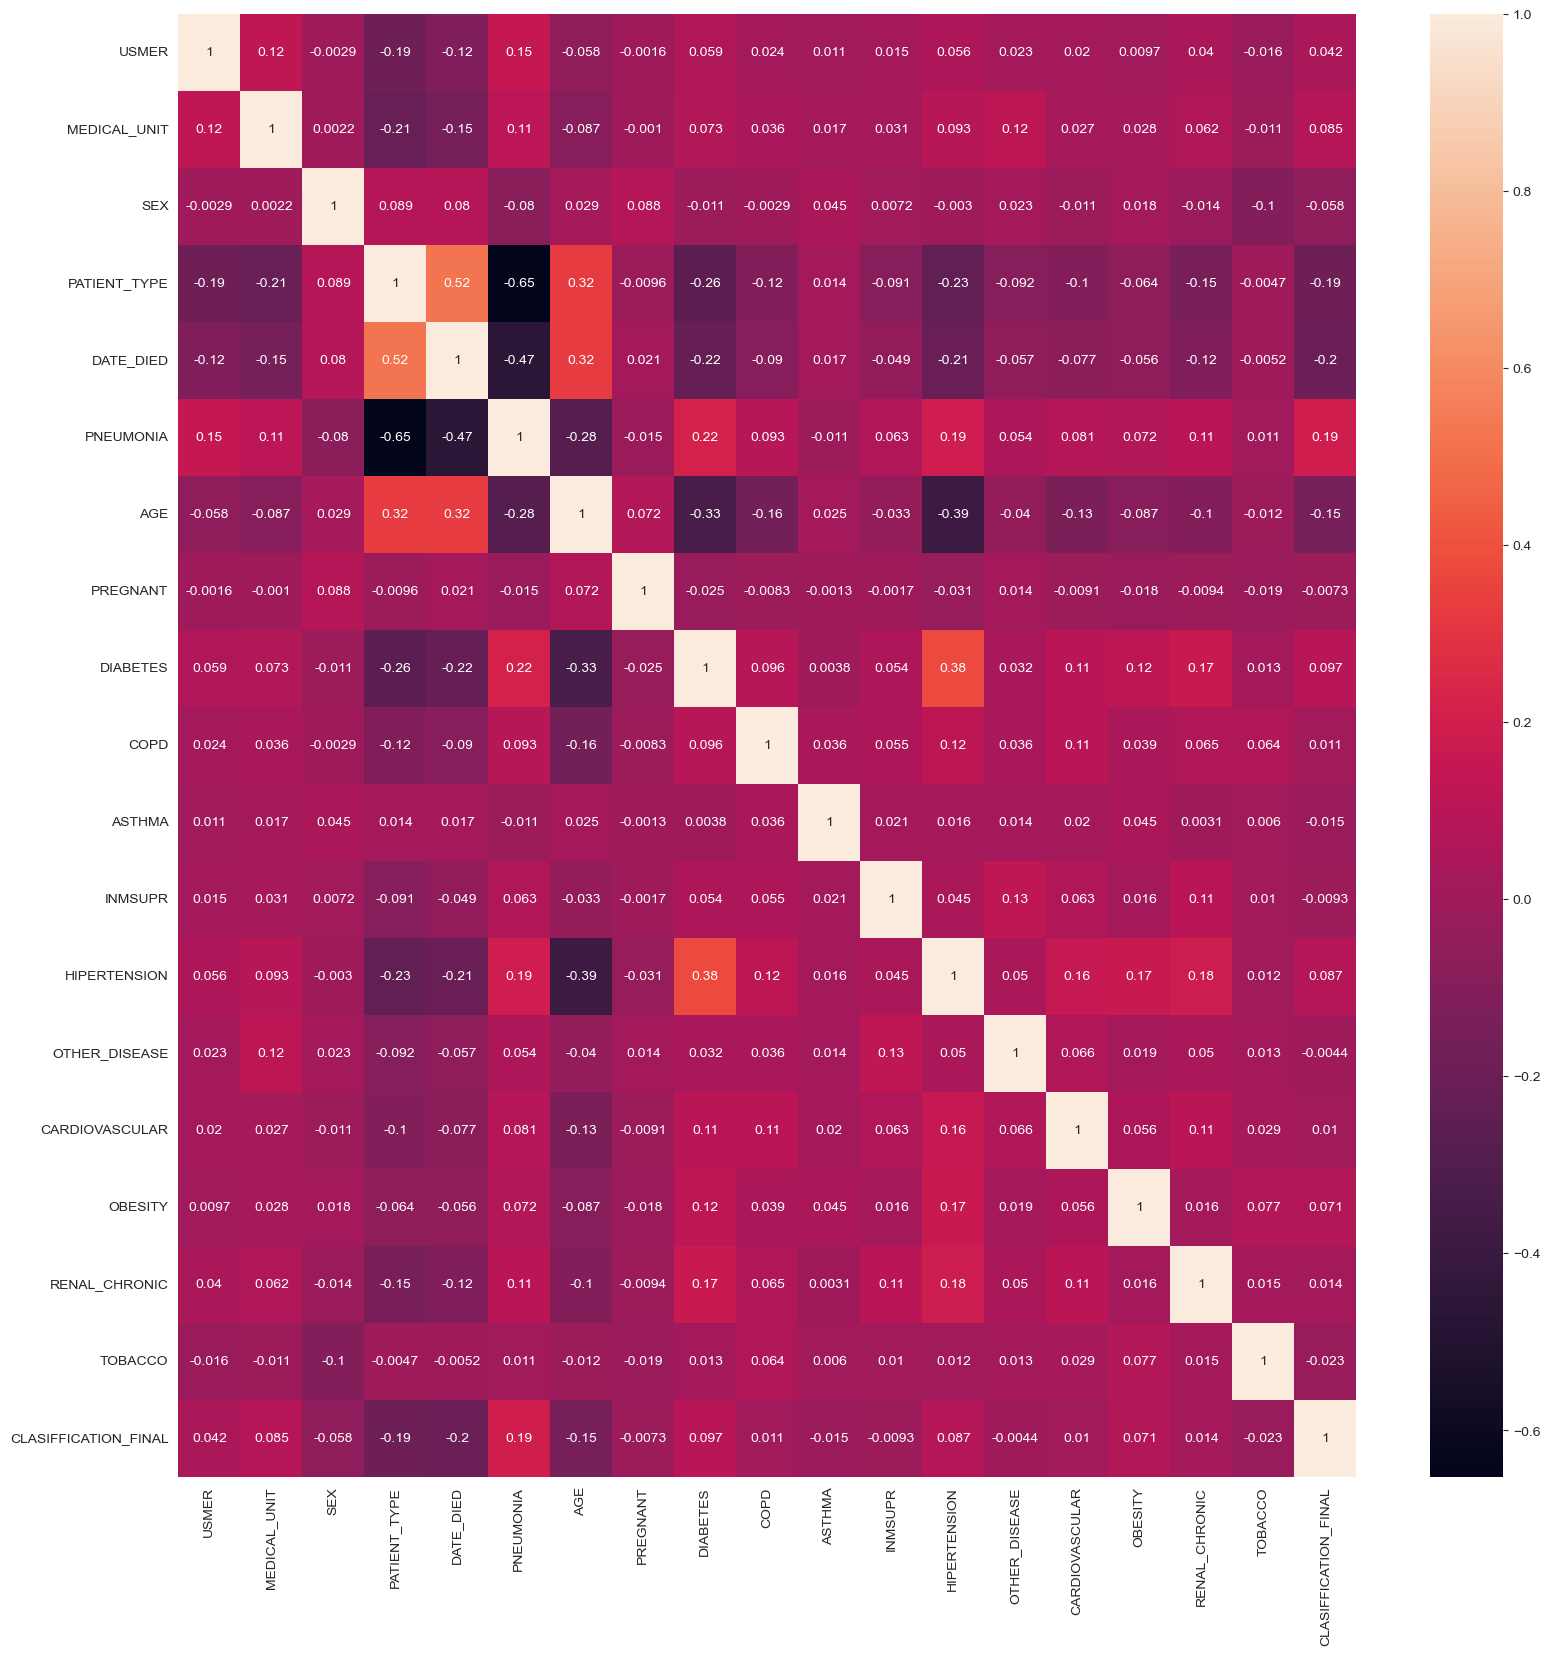

In [30]:
plt.figure(figsize=(19,19))
sns.heatmap(data = df_corr_v2,
            annot = True)
plt.show()

#### Investigating the change in correlation coefficients

In [31]:
df_corr_v1['DATE_DIED_v1'] = df_corr_v1['DATE_DIED']
df_corr_v2['DATE_DIED_v2'] = df_corr_v2['DATE_DIED']

df_corr_join = df_corr_v1.join(df_corr_v2,lsuffix='v1')
df_corr_join

,USMERv1,MEDICAL_UNITv1,SEXv1,PATIENT_TYPEv1,DATE_DIEDv1,PNEUMONIAv1,AGEv1,PREGNANTv1,DIABETESv1,COPDv1,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DATE_DIED_v2
USMER,1.000000,0.127927,-0.001126,-0.190570,-0.112671,0.152041,-0.045088,0.000498,0.056317,0.026497,...,0.010814,0.014634,0.055579,0.022722,0.019724,0.009750,0.040389,-0.015850,0.041993,-0.118942
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,-0.149030,0.107562,-0.082223,-0.000329,0.071764,0.035768,...,0.017223,0.031078,0.093294,0.118490,0.027330,0.027708,0.062331,-0.011196,0.085228,-0.154430
SEX,-0.001126,0.001475,1.000000,0.089505,0.081383,-0.080975,0.028367,0.088749,-0.011062,-0.003194,...,0.044617,0.007211,-0.002953,0.023175,-0.011115,0.018131,-0.013629,-0.101778,-0.057842,0.080389
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,0.515582,-0.653553,0.315193,-0.011641,-0.256325,-0.119065,...,0.013546,-0.091140,-0.233801,-0.091741,-0.103013,-0.064340,-0.148830,-0.004715,-0.192644,0.520156
DATE_DIED,-0.112671,-0.149030,0.081383,0.515582,1.000000,-0.471559,0.320801,0.021245,-0.217199,-0.090238,...,0.017303,-0.049284,-0.205166,-0.057156,-0.076546,-0.056430,-0.119417,-0.005154,-0.197643,1.000000
PNEUMONIA,0.152041,0.107562,-0.080975,-0.653553,-0.471559,1.000000,-0.280672,-0.015070,0.217117,0.093618,...,-0.010554,0.062926,0.191546,0.054271,0.081102,0.072006,0.105372,0.011078,0.194096,-0.470891
AGE,-0.045088,-0.082223,0.028367,0.315193,0.320801,-0.280672,1.000000,0.071866,-0.331350,-0.167334,...,0.024813,-0.033316,-0.390888,-0.039891,-0.131456,-0.086924,-0.100976,-0.011548,-0.151773,0.322696
PREGNANT,0.000498,-0.000329,0.088749,-0.011641,0.021245,-0.015070,0.071866,1.000000,-0.024781,-0.008617,...,-0.001278,-0.001668,-0.030669,0.014257,-0.009138,-0.018040,-0.009429,-0.018779,-0.007305,0.021065
DIABETES,0.056317,0.071764,-0.011062,-0.256325,-0.217199,0.217117,-0.331350,-0.024781,1.000000,0.097450,...,0.003761,0.053519,0.377785,0.032452,0.107942,0.115876,0.166279,0.012973,0.096971,-0.217124
COPD,0.026497,0.035768,-0.003194,-0.119065,-0.090238,0.093618,-0.167334,-0.008617,0.097450,1.000000,...,0.035700,0.054610,0.116387,0.036310,0.108398,0.038683,0.065393,0.063907,0.010689,-0.089750


In [32]:
def diff(x,y):
    return x-y
df_corr_join['DIFF'] = df_corr_join.apply(lambda x: diff(x.DATE_DIED_v1,x.DATE_DIED_v2),axis=1)

In [33]:
df_corr_join[['DATE_DIED_v1','DATE_DIED_v2','DIFF']]

,DATE_DIED_v1,DATE_DIED_v2,DIFF
USMER,-0.112671,-0.118942,0.006271
MEDICAL_UNIT,-0.149030,-0.154430,0.005401
SEX,0.081383,0.080389,0.000995
PATIENT_TYPE,0.515582,0.520156,-0.004574
DATE_DIED,1.000000,1.000000,0.000000
PNEUMONIA,-0.471559,-0.470891,-0.000669
AGE,0.320801,0.322696,-0.001895
PREGNANT,0.021245,0.021065,0.000181
DIABETES,-0.217199,-0.217124,-0.000075
COPD,-0.090238,-0.089750,-0.000488


##### We can see that the largest change between the correlation coefficients is 0.006271. This is miniscule, so it seems that we have not lost much information after removing the null samples entirely.

### Investigating Age's distribution and outliers
#### Distribution

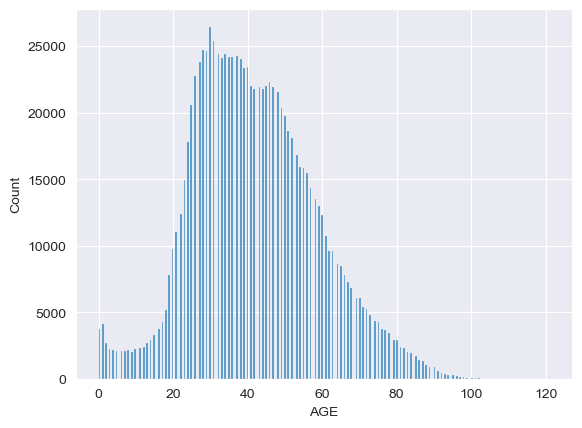

In [34]:
sns.histplot(data = df, x = df['AGE'])
plt.show()

##### Age seems to be quite normally distributed.
##### Checking below, the p-value is not reliable as the message displays but the test statistic is pretty close to perfect (i.e. 1), therefore we can assume that the age data is normally distributed.

In [35]:
stats.shapiro(df['AGE'])

C:\Users\Jan\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9892815947532654, pvalue=0.0)

#### Outliers

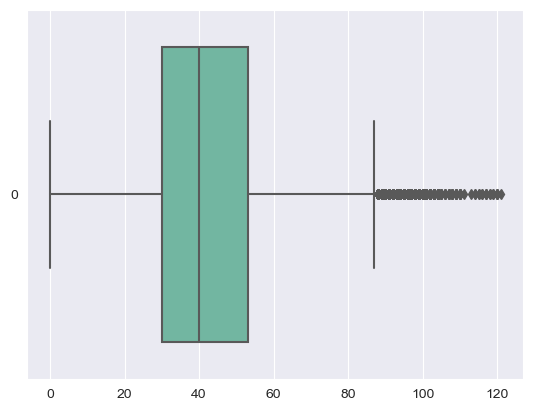

In [36]:
sns.boxplot(data=df['AGE'], orient="h", palette="Set2")
plt.show()

##### There are some values of age that go past the whiskers we want to see whether they are past the outer fence or not, if it is, it can be considered a probable outlier (https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755).

In [37]:
q1 = df['AGE'].quantile(0.25)
q3 = df['AGE'].quantile(0.75)
iqr = q3-q1
inner_fence = 1.5*iqr
outer_fence = 3*iqr

In [38]:
print('The upper outer fence: ')
print(q3+outer_fence)

The upper outer fence: 
122.0


##### Looking at samples where age is above 122 below. We can see that there are no examples where age is above or equal to 122. Given this information we will leave the variable as is.

In [39]:
df[(df['AGE']>=122)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL


##### Checking datatypes one last time

In [40]:
df.dtypes

USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
DATE_DIED                 int64
PNEUMONIA               float64
AGE                       int64
PREGNANT                float64
DIABETES                float64
COPD                    float64
ASTHMA                  float64
INMSUPR                 float64
HIPERTENSION            float64
OTHER_DISEASE           float64
CARDIOVASCULAR          float64
OBESITY                 float64
RENAL_CHRONIC           float64
TOBACCO                 float64
CLASIFFICATION_FINAL      int64
dtype: object

In [41]:
lst_ = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
        'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
        'RENAL_CHRONIC', 'TOBACCO']

for x in lst_:
    df[x] = df[x].astype(int)

In [42]:
df.dtypes

USMER                   int64
MEDICAL_UNIT            int64
SEX                     int64
PATIENT_TYPE            int64
DATE_DIED               int64
PNEUMONIA               int32
AGE                     int64
PREGNANT                int32
DIABETES                int32
COPD                    int32
ASTHMA                  int32
INMSUPR                 int32
HIPERTENSION            int32
OTHER_DISEASE           int32
CARDIOVASCULAR          int32
OBESITY                 int32
RENAL_CHRONIC           int32
TOBACCO                 int32
CLASIFFICATION_FINAL    int64
dtype: object

#### Exploring Variable Distributions Grouped by DATE_DIED

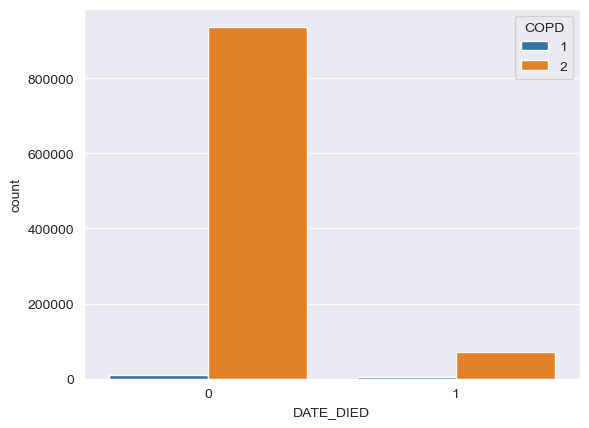

In [48]:
sns.countplot(data=df, x="DATE_DIED", hue="COPD")
plt.show()

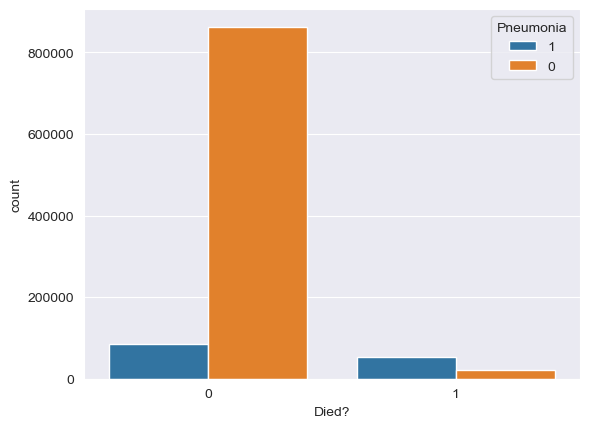

In [68]:
sns.countplot(data=df, x="DATE_DIED", hue="PNEUMONIA")
plt.xlabel('Died?')
plt.legend(title='Pneumonia', labels=['1', '0'])
plt.savefig('DEATH_PNEUMONIA.png')
plt.show()

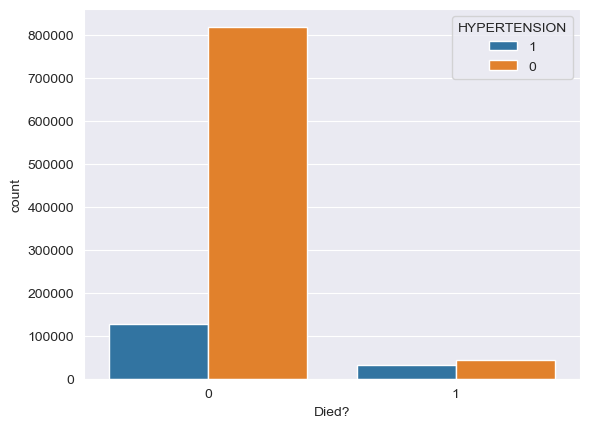

In [69]:
sns.countplot(data=df, x="DATE_DIED", hue="HIPERTENSION")
plt.xlabel('Died?')
plt.legend(title='HYPERTENSION', labels=['1', '0'])
plt.savefig('DEATH_HYPER.png')
plt.show()

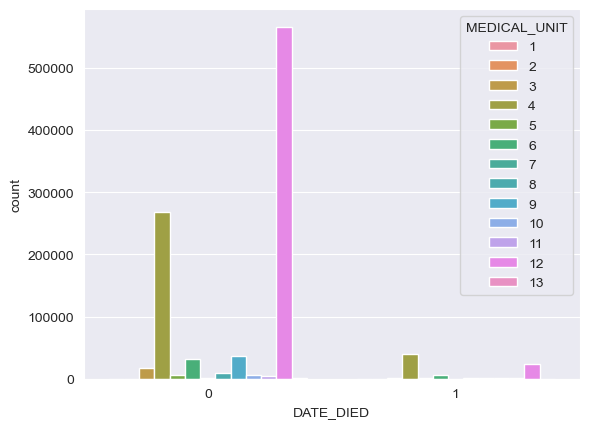

In [52]:
sns.countplot(data=df, x="DATE_DIED", hue="MEDICAL_UNIT")
plt.show()

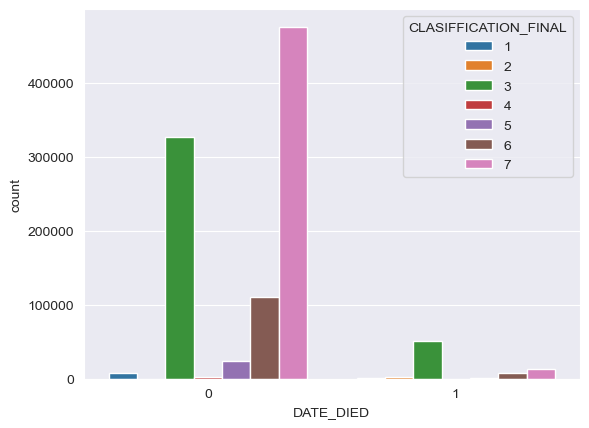

In [53]:
sns.countplot(data=df, x="DATE_DIED", hue="CLASIFFICATION_FINAL")
plt.show()

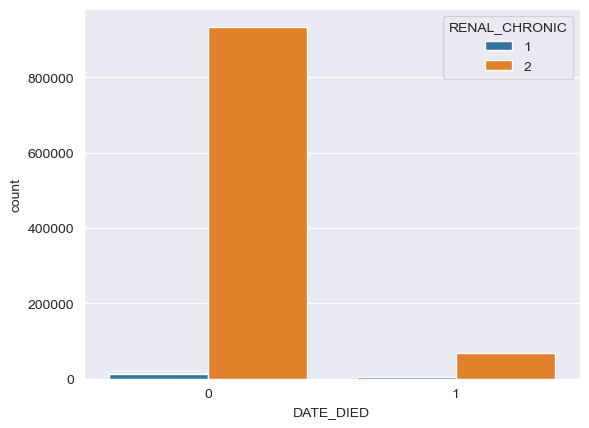

In [54]:
sns.countplot(data=df, x="DATE_DIED", hue="RENAL_CHRONIC")
plt.show()

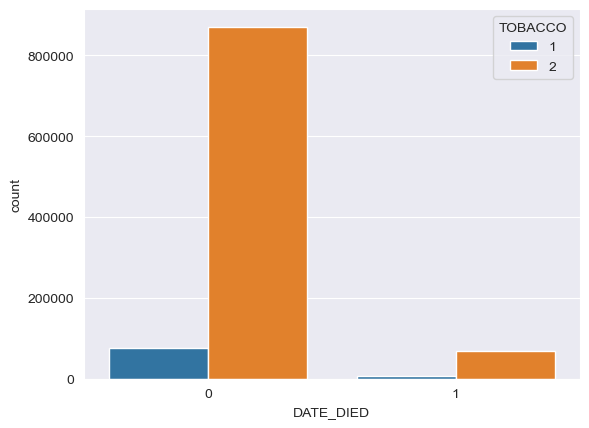

In [55]:
sns.countplot(data=df, x="DATE_DIED", hue="TOBACCO")
plt.show()

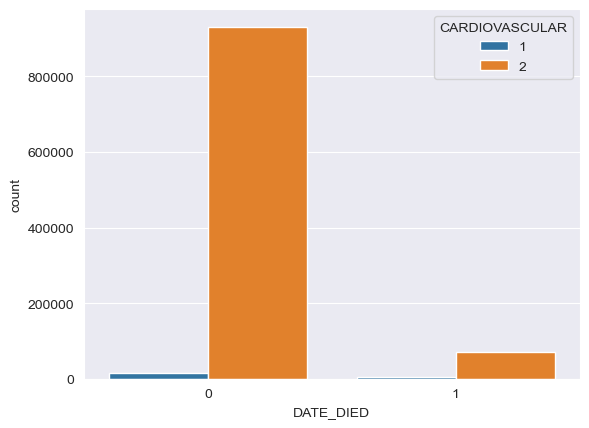

In [56]:
sns.countplot(data=df, x="DATE_DIED", hue="CARDIOVASCULAR")
plt.show()

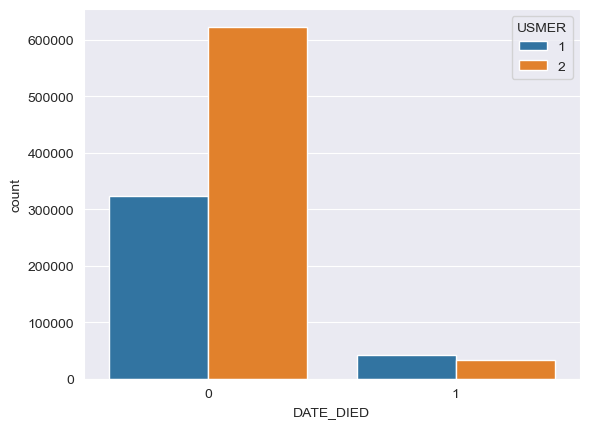

In [58]:
sns.countplot(data=df, x="DATE_DIED", hue="USMER")
plt.show()

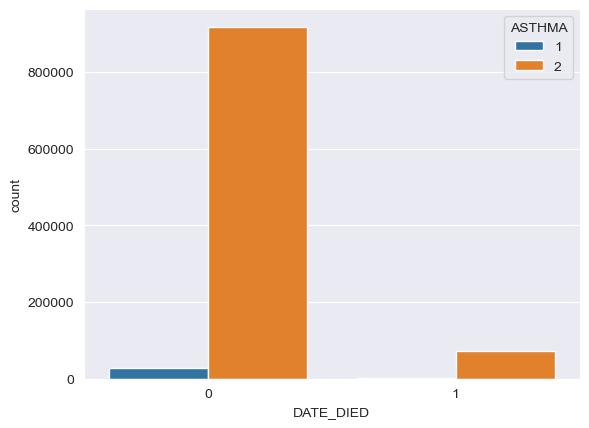

In [59]:
sns.countplot(data=df, x="DATE_DIED", hue="ASTHMA")
plt.show()

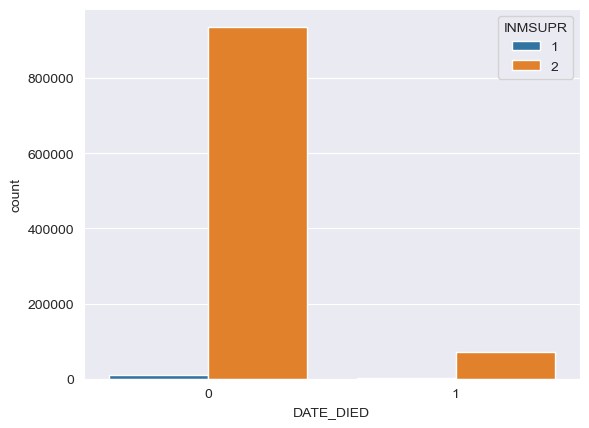

In [60]:
sns.countplot(data=df, x="DATE_DIED", hue="INMSUPR")
plt.show()

##### We can see that there are a few features that should be able to differentiate between dying and surviving, their proportions of yes and no are different depending on whether the patient has died or not. Pneumonia, Hypertension, USMER are the ones.

##### One Hot Encoding: 'ClASSIFICATION_FINAL' and 'MEDICAL_UNIT'

In [43]:
def OneHotEncoding(df,lst,drop):
    """Carries out One Hot Encoding for given list of variables."""
    for i in range(len(lst)):
        df = pd.get_dummies(df, columns = [lst[i]], prefix = lst[i], drop_first=drop)
    return df

In [44]:
df = OneHotEncoding(df=df,lst=['CLASIFFICATION_FINAL','MEDICAL_UNIT'],drop=False)

In [45]:
df.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,...,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13
0,2,1,1,1,1,65,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,1,1,72,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,1,2,55,2,1,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,2,53,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,1,2,68,2,1,2,2,...,0,0,0,0,0,0,0,0,0,0


##### Finally, we will rename the 'DATE_DIED' variable to 'DEATH'

In [46]:
df['DEATH'] = df['DATE_DIED']
df.drop(columns='DATE_DIED',inplace=True)
df.columns

Index(['USMER', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL_1', 'CLASIFFICATION_FINAL_2',
       'CLASIFFICATION_FINAL_3', 'CLASIFFICATION_FINAL_4',
       'CLASIFFICATION_FINAL_5', 'CLASIFFICATION_FINAL_6',
       'CLASIFFICATION_FINAL_7', 'MEDICAL_UNIT_1', 'MEDICAL_UNIT_2',
       'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5', 'MEDICAL_UNIT_6',
       'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9', 'MEDICAL_UNIT_10',
       'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12', 'MEDICAL_UNIT_13', 'DEATH'],
      dtype='object')

##### Saving the dataframe into .csv file format


In [47]:
df.to_csv('COVID_Clean_Data_OHE.csv')